In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
olympic=pd.read_csv("athlete_events.csv")
regions=pd.read_csv("noc_regions.csv")

In [6]:
olympic.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
olympic=pd.merge(olympic, regions, on="NOC", how="left")

In [9]:
olympic.shape

(271116, 17)

In [10]:
olympic.isnull().sum() # missing value check

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [11]:
olympic["Medal"]=olympic['Medal'].fillna("No Medal")


In [12]:
from pandas import DataFrame
unique_id=olympic.drop_duplicates("ID")
unique_id.head(6)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal,USA,NaN


In [13]:
unique_id.shape

(135571, 17)

Total 135571 athletics have participated in the olympic since 1896

In [14]:
olympic["Medal"].value_counts() #수여된 메달의 갯수

No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

The medals have not been conferred evenly.

In [15]:
Not_duplicated=olympic.drop_duplicates(["ID", "Year"], keep="last")
Not_duplicated.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,USA,NaN
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,USA,NaN
21,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,USA,NaN


# 1. Yearly Trend of Olympic

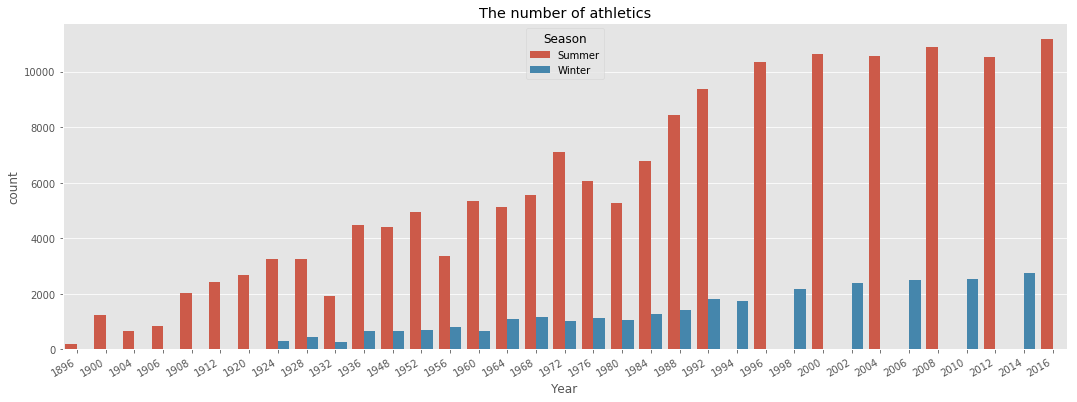

In [21]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="The number of athletics")
sns.countplot(data=Not_duplicated, x="Year", hue="Season")

At th beginning of the olympics, winter and summer olympics have been held in the same year.
But since 1994, the winter and summer olympic have been held in the different year.

how many women have participated in olympics?

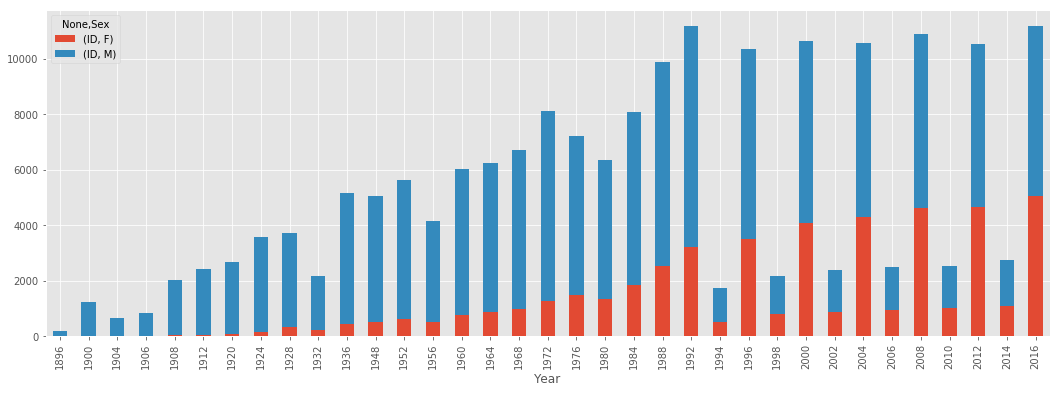

In [22]:
Splited_sex=Not_duplicated.groupby(['Sex', "Year"]).count()[["ID"]]
df=Splited_sex.unstack('Sex').fillna(0)

from matplotlib import rcParams
rcParams['figure.figsize']=18, 6

df.plot(kind='bar', stacked=True)

In [23]:
not_duplicated_sport=olympic[['Sport']].drop_duplicates("Sport")
not_duplicated_sport.head(5)


,Sport
0,Basketball
1,Judo
2,Football
3,Tug-Of-War
4,Speed Skating


In [50]:
not_duplicated_sport.shape

(66, 1)

There have been total 66 kinds of sports in olympics.


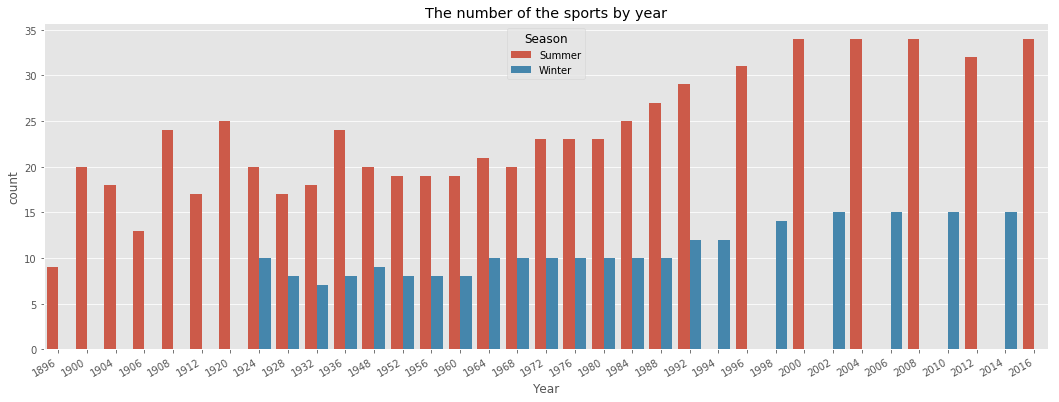

In [54]:
Sport_by_Year=Not_duplicated.groupby(["Year","Season", "Sport"])[["ID"]].count().reset_index()
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="The number of the sports by year")
sns.countplot(data=Sport_by_Year, x="Year", hue="Season")


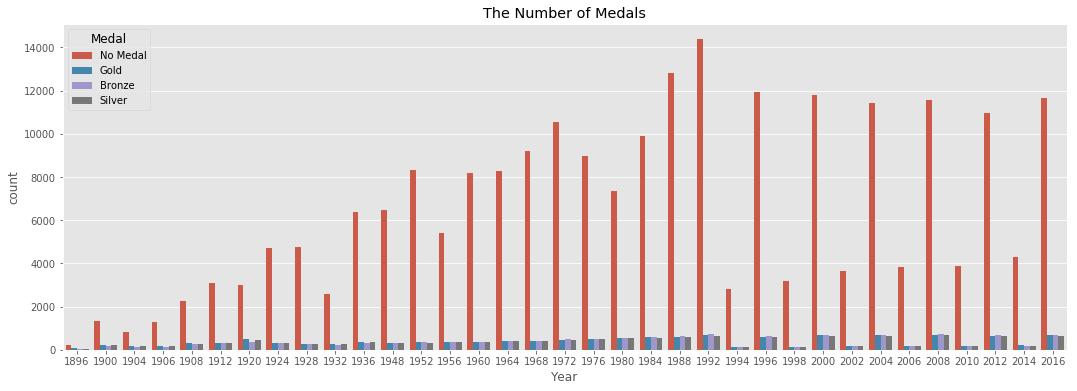

In [55]:
year_medal=olympic[["Medal", "Year"]]
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
ax1.set(ylabel='Count',title="The Number of Medals")
sns.countplot(data=year_medal, x="Year", hue="Medal")

남자와 여자의 키, 몸무게, 나이의 변화.
올림픽 경기 초반엔 키와 몸무게, 나이의 편차가 꽤 컸으나 시간이 흐르면서 줄어들었다.
윈터와 써머별로 키와 몸무게에 차이가 꽤 있다. 이 차이는 남자보다 여자가 두드러진다.
키와 몸무게 뿐만 아니라 나이도 여자의 수치가 작다.

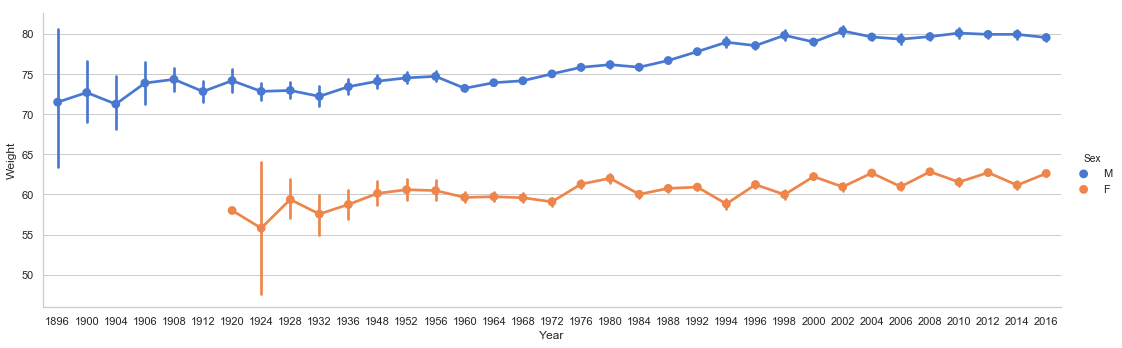

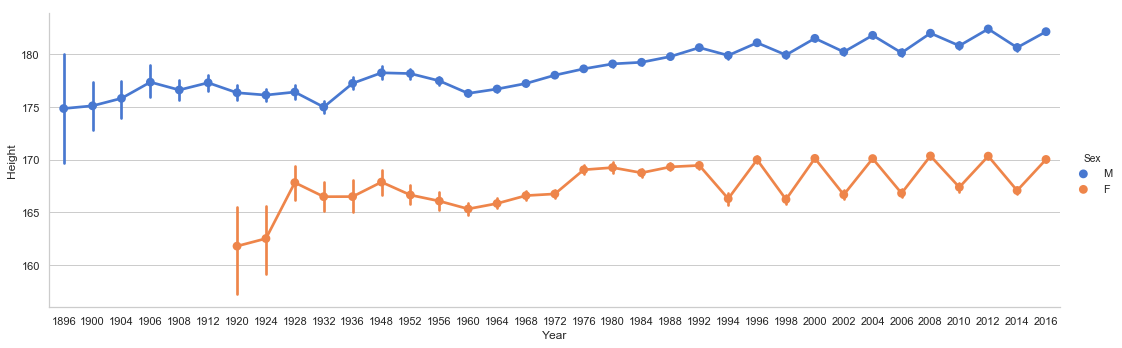

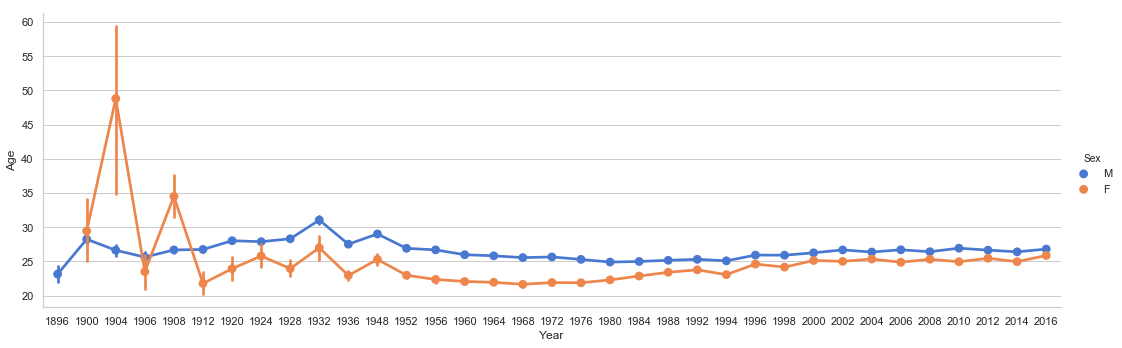

In [56]:
sns.set(style="whitegrid", palette="muted")
sns.catplot(x="Year", y="Weight", hue="Sex",kind="point", data=Not_duplicated, height=5, aspect=3)
sns.catplot(x="Year", y="Height",hue="Sex", kind="point", data=Not_duplicated, height=5, aspect=3)
sns.catplot(x="Year", y="Age",hue="Sex",kind="point",  data=Not_duplicated, height=5, aspect=3)


In [57]:
Year_Sport=Not_duplicated.groupby(["Year","Sport","Season"])[["ID"]].count()
Year_Sport=Year_Sport.add_suffix('_Count').reset_index()

Summer_Sport=Year_Sport[Year_Sport.Season=="Summer"].reset_index(drop=True)
Summer_Sport["Rank"]=Summer_Sport.groupby("Year")[['ID_Count']].rank(ascending=0, method='dense')


Winter_Sport=Year_Sport[Year_Sport.Season!="Summer"].reset_index(drop=True)
Winter_Sport["Rank"]=Winter_Sport.groupby("Year")[['ID_Count']].rank(ascending=0, method='dense')

Top_Rank_Summer=Summer_Sport[(Summer_Sport.Rank<5)]
Top_Rank_Winter=Winter_Sport[(Winter_Sport.Rank<5)]

df=pd.pivot_table(Top_Rank_Summer,index="Year", columns="Sport", values="ID_Count").fillna(0)



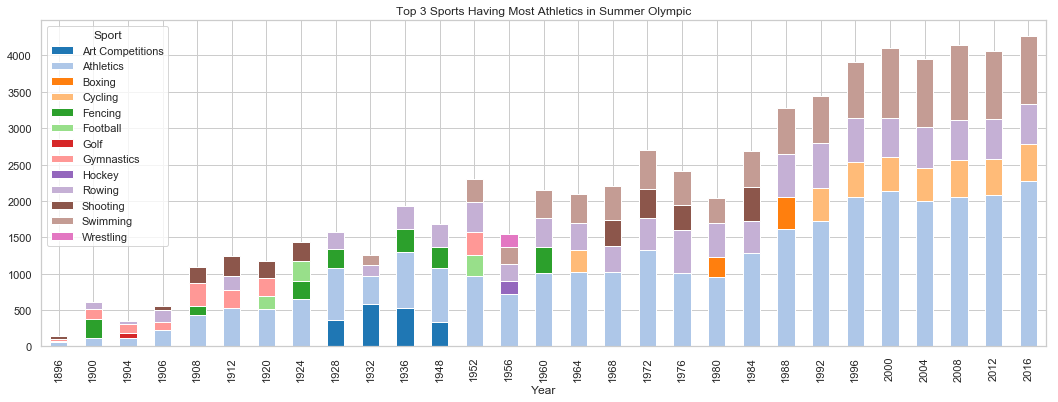

In [58]:
from bokeh.palettes import Category20

df.plot(kind='bar', stacked=True, color=Category20[20], title="Top 3 Sports Having Most Athletics in Summer Olympic")

여름 올림픽의 출전자가 많은 종목, 참가 선수가 네번째로 많았던 종목들만을 모아 stack barplot을 그렸다. 
눈에띄는 것: Art Competitions이라는 해괴한 종목이 1928년부터 1948년까지 네번의 올림픽 동안 꽤 많은 선수가 참가하였다 
             항상 Athletics는 선수가 제일 많이 출전하는 종목이다.
             92년 올림픽부터 cycling이 4위를 유지하였다.
             52년부터 수영이 꾸준히 많이 출전하는 종목이 되엇다.
             rowing은 28년부터.

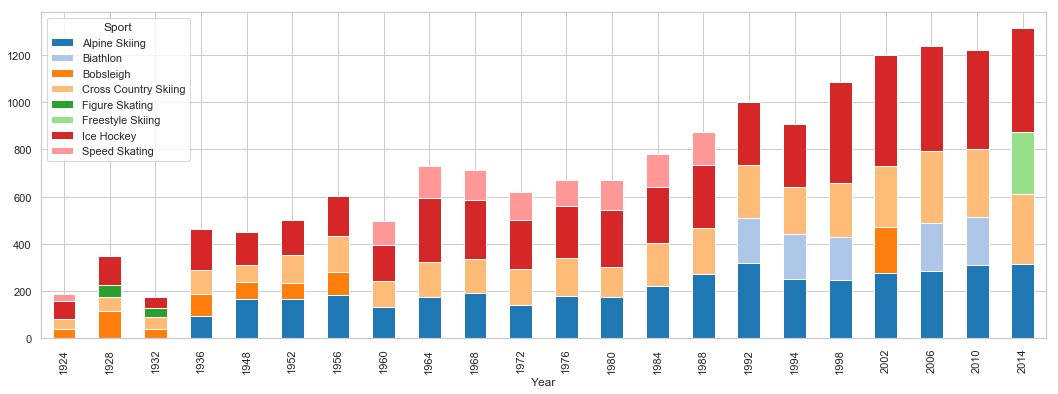

In [59]:
df2=pd.pivot_table(Top_Rank_Winter,index="Year", columns="Sport", values="ID_Count").fillna(0)
df2.plot(kind='bar', stacked=True, color=Category20[20])

겨울 올림픽의 출전자가 많은 종목, 참가 선수가 네번째로 많았던 종목들만을 모아 stack barplot을 그렸다. 
눈에 띄는 것: 항상 아이스하키 선수가 제일 많이 출전한다.
               알파인 스키는 36년부터
                크로스 컨트리는 항상
                스피드 스케이팅은 92년 부터 4위 안에 들지 못햇다
                프리스타일 스키가 갑툭튀한 2014년
                봅슬레이가 올림픽 초반엔 선수가 많이 출전하다가 60년에 랭킹이 내려갓다 다시 2002년년에 등장하였다.

In [195]:
Year_Nation=Not_duplicated.groupby(["Year", "region", "Season"])[["ID"]].count().add_suffix('_Count').reset_index()
Year_Nation=Year_Nation.sort_values(['Year', 'ID_Count'], ascending=[True, False])
Year_Nation_Summer=Year_Nation[Year_Nation["Season"]=="Summer"].reset_index()
Year_Nation_Summer["Rank"]=Year_Nation_Summer.groupby("Year")[['ID_Count']].rank(ascending=0, method='dense')

Year_Nation_Winter=Year_Nation[Year_Nation["Season"]!="Summer"].reset_index()
Year_Nation_Winter["Rank"]=Year_Nation_Winter.groupby("Year")[['ID_Count']].rank(ascending=0, method='dense')


Top_Rank_Nation_Summer=Year_Nation_Summer[Year_Nation_Summer["Rank"]<4]
Top_Rank_Nation_Summer=Top_Rank_Nation_Summer.drop(["index"], axis=1)


Top_Rank_Nation_Winter=Year_Nation_Winter[Year_Nation_Winter["Rank"]<4]
Top_Rank_Nation_Winter=Top_Rank_Nation_Winter.drop(["index"], axis=1)
Year_Nation

,Year,region,Season,ID_Count
5,1896,Greece,Summer,102
4,1896,Germany,Summer,19
11,1896,USA,Summer,14
3,1896,France,Summer,12
10,1896,UK,Summer,10
6,1896,Hungary,Summer,7
1,1896,Austria,Summer,3
2,1896,Denmark,Summer,3
9,1896,Switzerland,Summer,3
0,1896,Australia,Summer,1


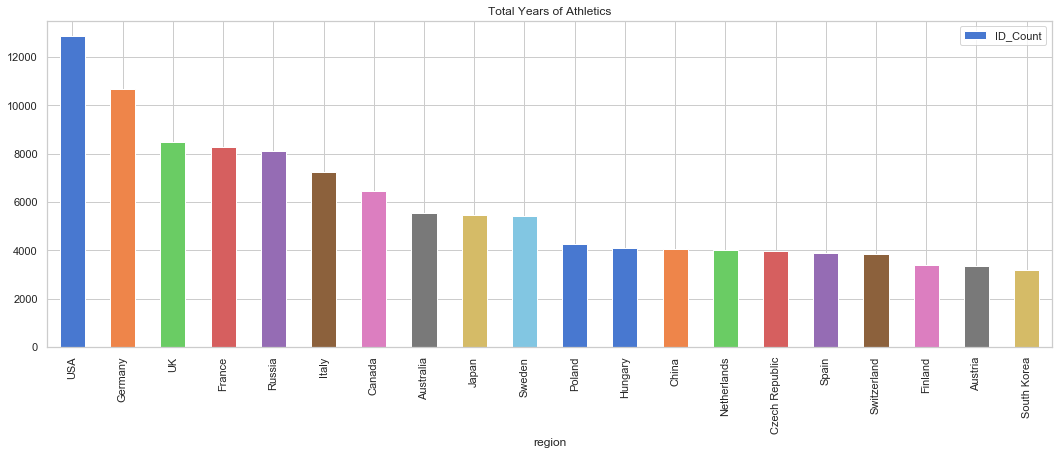

In [196]:
Nation=Year_Nation.groupby("region")[["ID_Count"]].sum().reset_index()
Nation=Nation[Nation.region!="Individual Olympic Athletes"].reset_index(drop=True)
Nation.sort_values("ID_Count", ascending=False).head(20).plot(kind="bar", x='region', y='ID_Count', title='Total Years of Athletics')

In [180]:
import requests
import pprint
import config

location = Nation["region"]
lat=[]
lng=[]

In [181]:
# lat, lon data from google maps
for i in range(len(location)):
    URL = 'https://maps.googleapis.com/maps/api/geocode/json?key={}' \
'&sensor=false&language=ko&address={}{}'.format(config.api_key, location[i], " country")
    response = requests.get(URL)

# JSON parsing
    data = response.json()

    lat.append(data['results'][0]['geometry']['location']['lat'])
    lng.append(data['results'][0]['geometry']['location']['lng'])

# print() 함수 대신 pprint.pprint() 함수를 사용하는 이유는 좀 더 보기 쉽게 출력하기 위함입니다.


In [200]:
Nation["lat"]=lat
Nation["lng"]=lng
Nation.head()

,region,ID_Count,lat,lng
0,Afghanistan,121,33.939110,67.709953
1,Albania,59,41.153332,20.168331
2,Algeria,491,28.033886,1.659626
3,American Samoa,37,-14.270972,-170.132217
4,Andorra,98,42.506285,1.521801


In [183]:
##reference: https://python-graph-gallery.com/category/map/
# import the library
import folium
 
Nation['lat']=Nation['lat'].astype(float)
Nation['lng']=Nation['lng'].astype(float)
Nation['ID_Count']=Nation['ID_Count'].astype(float)



In [184]:
 # Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(Nation)):
    folium.Circle(location=[Nation.iloc[i]['lat'], Nation.iloc[i]['lng']], popup=Nation.iloc[i]['region'],
                       radius=Nation.iloc[i]['ID_Count']*70, color='crimson', fill=True, fill_color='crimson').add_to(m)
 
# Save it as html
m


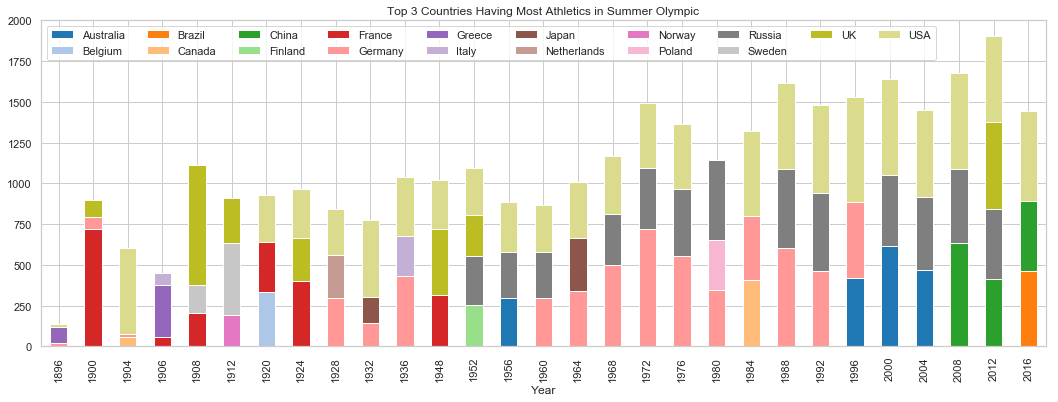

In [197]:
Top_Rank_Nation_Summer
df=pd.pivot_table(Top_Rank_Nation_Summer,index="Year", columns="region", values="ID_Count").fillna(0)
df.plot(kind='bar', stacked=True, color=Category20[20], title="Top 3 Countries Having Most Athletics in Summer Olympic")
plt.legend(ncol=10)

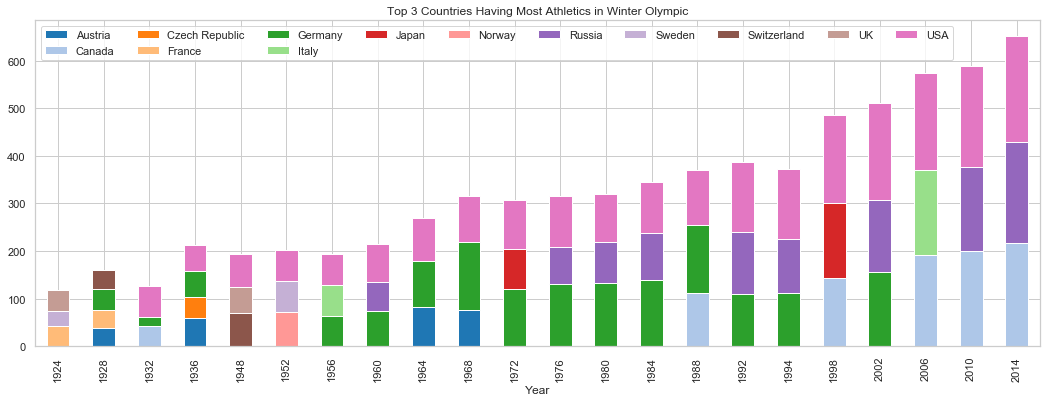

In [201]:
Top_Rank_Nation_Winter
df=pd.pivot_table(Top_Rank_Nation_Winter,index="Year", columns="region", values="ID_Count").fillna(0)
df.plot(kind='bar', stacked=True, color=Category20[20], title="Top 3 Countries Having Most Athletics in Winter Olympic")
plt.legend(ncol=10)

참가선수가 많은 나라 3위까지만 보여줌.

In [203]:
Medal_by_Nation=Not_duplicated.groupby(["Year", "region", "Medal"])[["ID"]].count().add_suffix('_Count').reset_index()
Medal_by_Nation=Medal_by_Nation[Medal_by_Nation.Medal!="No Medal"]
Medal_by_Nation.groupby("region")[["ID_Count"]].sum().reset_index().sort_values("ID_Count",ascending=False) #메달 갯수
Medal_by_Color=Medal_by_Nation.groupby(["Medal", "region" ])[["ID_Count"]].sum().reset_index().sort_values("ID_Count",ascending=False)#금은동 분류한 갯수
Gold_Medal=Medal_by_Color[Medal_by_Color.Medal=="Gold"]
Gold_Medal_p=pd.merge(Gold_Medal, Nation, on="region", how="left")
Gold_Medal=Gold_Medal_p.drop(['ID_Count_y'], axis=1)

Gold_Medal['ID_Count_x']=Gold_Medal['ID_Count_x'].astype(float)
Gold_Medal=Gold_Medal[Gold_Medal.region!="Individual Olympic Athletes"].reset_index(drop=True)

Gold_Medal_p['prob']=Gold_Medal_p['ID_Count_x']/Gold_Medal_p['ID_Count_y']

Gold_Medal_p=Gold_Medal_p.drop(['ID_Count_y','ID_Count_x'], axis=1)

Gold_Me

In [69]:
 # Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(Gold_Medal)):
    folium.Circle(location=[Gold_Medal.iloc[i]['lat'], Gold_Medal.iloc[i]['lng']], popup=Gold_Medal.iloc[i]['region'],
                       radius=Gold_Medal.iloc[i]['ID_Count_x']*1000, color='gold', fill=True, fill_color='crimson').add_to(m)
 
# Save it as html
m


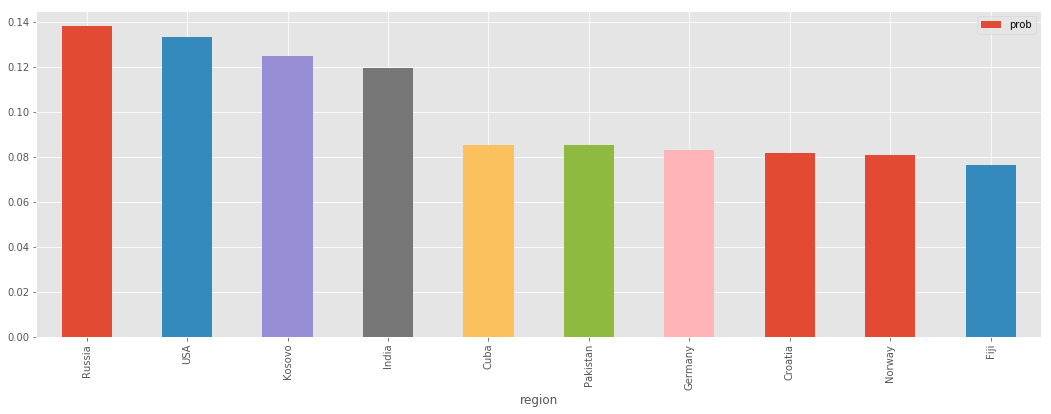

In [85]:
Gold_Medal_p.sort_values(by='prob', ascending=False).head(10).plot(kind='bar', x='region', y='prob')

In [25]:
# create new columns, Medal or Not
def new_col(x):
    a = np.nan
    if x == 'No Medal':
        a = "No Medal"
    elif x != 'No Medal':
        a = "Medal"
    return a

olympic['Medal or Not'] = olympic.Medal.apply(new_col)
Men=olympic[olympic["Sex"]=="M"]
Women=olympic[olympic["Sex"]=="F"]

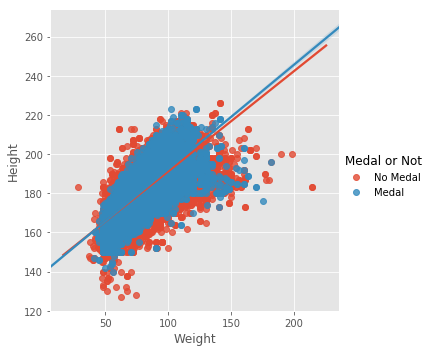

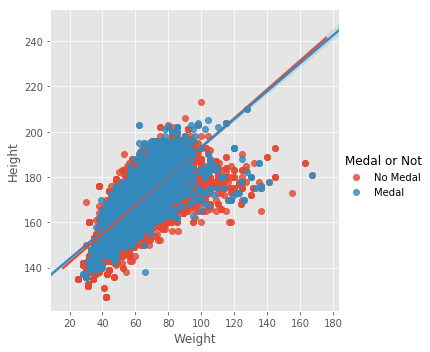

In [26]:
sns.lmplot(x="Weight", y="Height",hue='Medal or Not',  data=Men)
sns.lmplot(x="Weight", y="Height",hue="Medal or Not",  data=Women)

#플롯 미씽밸류 조정해서 다시 만들어야함

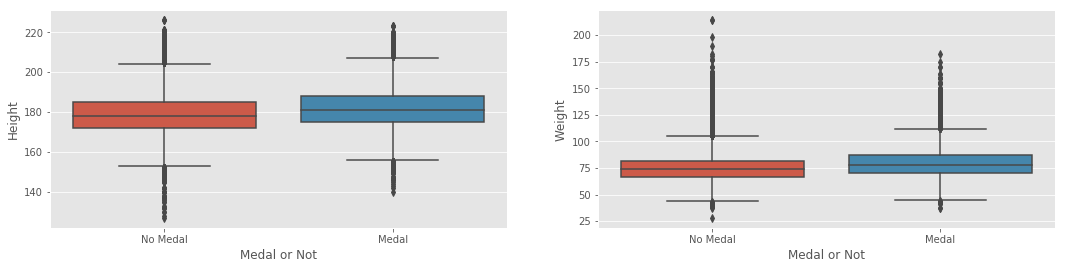

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 
fig.set_size_inches(18, 4)
sns.boxplot(y="Height", x="Medal or Not", data=Men, ax=ax1)
sns.boxplot(y="Weight", x="Medal or Not", data=Men, ax=ax2)

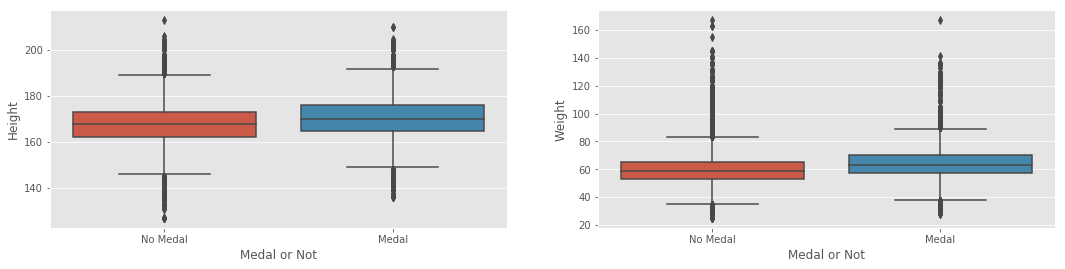

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 
fig.set_size_inches(18, 4)
sns.boxplot(y="Height", x="Medal or Not", data=Women, ax=ax1)
sns.boxplot(y="Weight", x="Medal or Not", data=Women, ax=ax2)

In [42]:
len(olympic["ID"].unique())

135571